# Herança e polimorfismo

## Professor Dr. Henry Cagnini

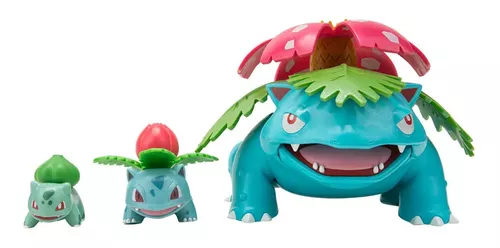

In [1]:
# código para mostrar diagrama do mermaid
import base64
from IPython.display import Image, display
import matplotlib.pyplot as plt

def mm(graph):
  graphbytes = graph.encode("ascii")
  base64_bytes = base64.b64encode(graphbytes)
  base64_string = base64_bytes.decode("ascii")
  display(
    Image(
      url="https://mermaid.ink/img/"
      + base64_string + "?bgColor=FFFFFF"
    )
  )

## Agenda

* Aula passada
* Herança
* Polimorfismo
  * Sobrecarga de métodos
* Classes na biblioteca Django
* Exercícios
* Tema de casa

## Aula passada

Declarando uma classe

In [2]:
class Animal:
    def __init__(self, nome):
        self.nome = nome

    def faz_barulho(self):
        return 'Au! Au!'

Instanciando uma classe

In [3]:
dog = Animal('cachorro')
print(dog.nome)

cachorro


In [4]:
print(dog.faz_barulho())

Au! Au!


## Herança

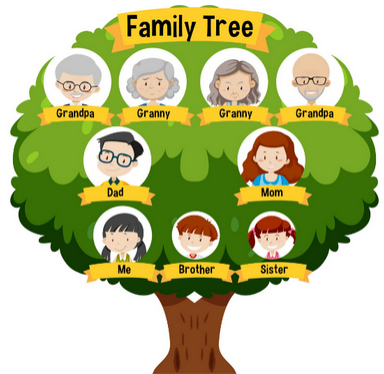

## Herança

### O que é?

Herança é uma característica central do paradigma orientado a objetos. É a capacidade de certas classes herdarem características de outras.


Vamos pensar em uma classe que descreve um objeto. 

Quais características todos os objetos possuem?

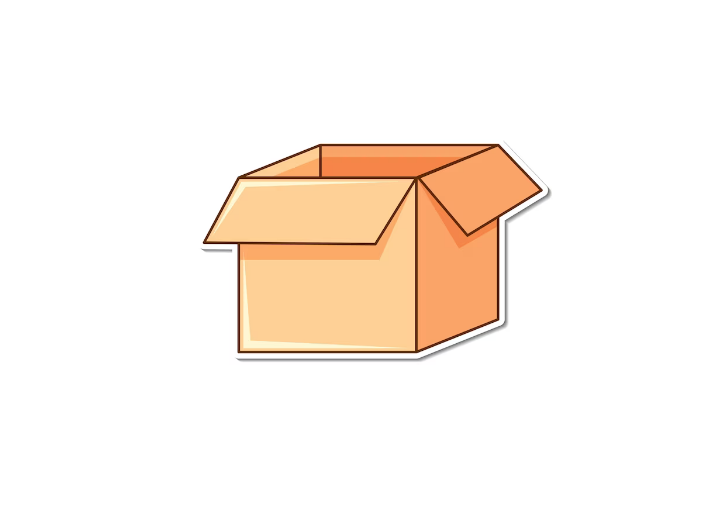

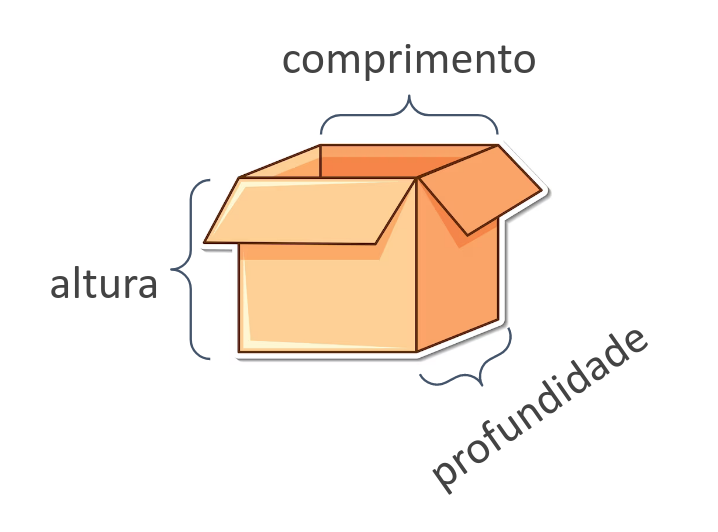

Código em Python:

In [5]:
class Objeto:
    def __init__(self, largura, altura, comprimento):
        """Construtor da classe Objeto"""
        self.largura = largura
        self.altura = altura
        self.comprimento = comprimento

caixa = Objeto(largura=10, altura=5, comprimento=3)

Vamos agora definir uma _subclasse_ que irá especializar `Objeto`, herdando **todos** seus atributos, enquanto adiciona outros

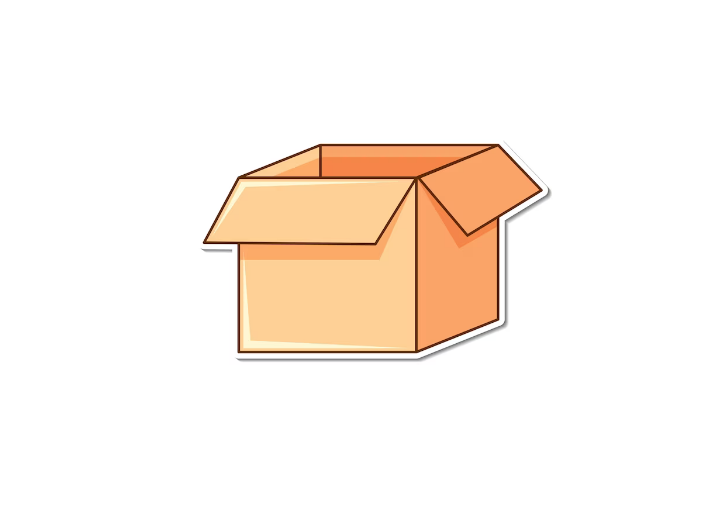

* `Objeto`:
    * **Atributos:** Altura, Largura, comprimento
    * **Métodos:** _nenhum_
* `Animal`:
    * **Atributos:** nº patas, nº olhos, peso
    * **Métodos:** comunicar, respirar


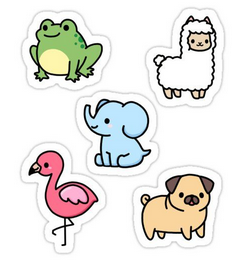

Herdando a classe `Objeto` de maneira simples:

In [6]:
class Animal(Objeto):
    pass

A classe `Animal` possui todos os métodos e atributos da classe `Objeto`, mas ainda não fez nenhuma especialização!

Precisamos **sobrecarregar** o **construtor** da classe `Animal` para aceitar mais parâmetros, fazendo-o receber também os parâmetros `numero_patas`, `numero_olhos` e `cor`

In [7]:
class Animal(Objeto):
    def __init__(self, largura, altura, comprimento, 
                 numero_patas, numero_olhos, peso):
        """Construtor da classe Animal"""
        super().__init__(largura, altura, comprimento)
        self.numero_patas = numero_patas
        self.numero_olhos = numero_olhos
        self.peso = peso


cachorro = Animal(
    largura=10, altura=30, comprimento=50, 
    numero_patas=4, numero_olhos=4, peso=15
)

O que esta linha de código está fazendo?

```python
super().__init__(largura, altura, comprimento)
```

Ela chama o método `__init__` da classe `Objeto`, que por sua vez é superclasse (`super`) da classe `Animal`

Na prática, é como se a chamada ao método `super().__init__` copiasse e colasse 📋 o código-fonte do construtor `__init__` da classe `Objeto`:

In [8]:
class Animal(Objeto):
    def __init__(self, largura, altura, comprimento, 
                 numero_patas, numero_olhos, peso):
        """Construtor da classe Animal"""
        # código copiado-e-colado do construtor de Objeto
        self.largura = largura
        self.altura = altura
        self.comprimento = comprimento
        # código copiado-e-colado do construtor de Objeto
        
        self.numero_patas = numero_patas
        self.numero_olhos = numero_olhos
        self.peso = peso

## Herança e Polimorfismo

Esse é o primeiro exemplo de **polimorfismo** nessa aula.

**Polimorfismo** é quando um método de uma _superclasse_ é **sobrecarregado** para possuir outro comportamento em uma _subclasse_

**Diagrama de Classes** (um tipo de diagrama da linguagem UML) das classes `Objeto` e `Animal` é o seguinte:

In [9]:
diagram_inheritance_1 = '''
classDiagram
    direction LR
    Objeto <|-- Animal

    class Objeto {
        +largura
        +altura
        +comprimento 
    }
    class Animal{
      +numero_patas
      +numero_olhos
      +peso
      +comunicar()
      +respirar()
    }
'''

In [10]:
mm(diagram_inheritance_1)  # código só para mostrar o diagrama

Lembra-se que deveríamos implementar dois métodos da classe `Animal`? Vamos terminar de implementá-los:

```python
class Animal(Objeto):
    def __init__(self, largura, altura, comprimento, 
                 numero_patas, numero_olhos, peso):
        """Construtor da classe Animal"""
        super().__init__(largura, altura, comprimento)
        self.numero_patas = numero_patas
        self.numero_olhos = numero_olhos
        self.peso = peso
```

```python
    def comunicar(self):
        pass  # não faz nada ainda
```
```python
    def respirar(self):
        pass  # não faz nada ainda
```

In [11]:
class Animal(Objeto):
    def __init__(self, largura, altura, comprimento, 
                 numero_patas, numero_olhos, peso):
        """Construtor da classe Animal"""
        super().__init__(largura, altura, comprimento)
        self.numero_patas = numero_patas
        self.numero_olhos = numero_olhos
        self.peso = peso

    def comunicar(self):
        pass  # não faz nada ainda

    def respirar(self):
        pass  # não faz nada ainda

## Polimorfismo

É possível **sobrescrever** mais métodos além do construtor `__init__`. Vamos criar duas novas classes, `Cachorro` e `Peixe`. Cada uma destas classes irá 
sobrescrever a classe `Animal`:

In [12]:
class Cachorro(Animal):
    def comunicar(self):
        return 'Au! Au!'

    def respirar(self):
        return 'Arf! Arf!'

In [13]:
class Peixe(Animal):
    def comunicar(self):
        return 'Glub! Glub!'

    def respirar(self):
        return 'Glub! Glub!'

Instanciando objetos das classes `Animal` e `Cachorro`:

In [14]:
cachorro_1 = Animal(
    largura=10, altura=30, comprimento=50, 
    numero_patas=4, numero_olhos=4, peso=15
)
cachorro_1.comunicar()  # não imprime nada na tela

In [15]:
cachorro_2 = Cachorro(
    largura=10, altura=30, comprimento=50, 
    numero_patas=4, numero_olhos=4, peso=15
)
cachorro_2.comunicar()  # imprime 'Au! Au!'

'Au! Au!'

Você percebeu como, apesar dos parâmetros serem os mesmos, o comportamento é diferente? Repare de novo:

In [16]:
cachorro_1 = Animal(
    largura=10, altura=30, comprimento=50, 
    numero_patas=4, numero_olhos=4, peso=15
)
cachorro_1.comunicar()  # não imprime nada na tela

In [17]:
cachorro_2 = Cachorro(
    largura=10, altura=30, comprimento=50, 
    numero_patas=4, numero_olhos=4, peso=15
)
cachorro_2.comunicar()  # imprime 'Au! Au!'

'Au! Au!'

Isto acontece pois a classe `Cachorro` especializou a classe `Animal`, atribuindo um novo comportamento ao método `comunicar`. Isto também ocorre com a classe `Peixe`:

In [18]:
traira = Animal(
    largura=5, altura=5, comprimento=40, 
    numero_patas=0, numero_olhos=2, peso=2
)
traira.comunicar()  

In [19]:
traira = Peixe(
    largura=5, altura=5, comprimento=40, 
    numero_patas=0, numero_olhos=2, peso=2
)
traira.comunicar()  

'Glub! Glub!'

Outro detalhe: você percebeu que não foi preciso reescrever o construtor de `Animal` nas classes `Cachorro` e `Peixe`?

In [20]:
class Cachorro(Animal):
    def comunicar(self):
        return 'Au! Au!'

    def respirar(self):
        return 'Arf! Arf!'

Quando não reescrevemos o construtor de `Animal` em `Cachorro`, **não estamos** sobrecarregando este método. Desta forma, o comportamento do construtor em `Cachorro` será **o mesmo** que o comportamento do construtor em `Animal`

O diagrama de classes das classes vistas nesta aula atualmente está da seguinte forma:

In [21]:
# código do diagrama
diagram_inheritance_2 = '''
classDiagram
    direction LR

     Objeto <|-- Animal

    Animal <|-- Cachorro
    Animal <|-- Peixe

    class Objeto {
        +largura
        +altura
        +comprimento 
    }
    
    class Animal{
      +numero_patas
      +numero_olhos
      +peso
      +comunicar()
      +respirar()
    }
    
    class Cachorro{
        ^comunicar()
        ^respirar()
    }

    class Peixe{
        ^comunicar()
        ^respirar()
    }
'''

In [22]:
mm(diagram_inheritance_2)  # código só para mostrar o diagrama

## Exercícios 

Responda as seguintes perguntas:

1. É possível sobrescrever um método em uma subclasse que muda o número de parâmetros da superclasse? 🤔
2. É possível sobrescrever um método em uma subclasse mais de uma vez? 👯
3. Uma subclasse pode herdar mais de uma superclasse? 👨‍👩‍👧

### É possível sobrescrever um método em uma subclasse que muda a assinatura de parâmetros da superclasse? 🤔

**Sim!**

```python
class Objeto:
    def __init__(self, largura, altura, comprimento):
        """Construtor da classe Objeto"""
        self.largura = largura
        self.altura = altura
        self.comprimento = comprimento
```

```python
class Animal(Objeto):
    def __init__(self, largura, altura, comprimento, 
                 numero_patas, numero_olhos, peso):
        """Construtor da classe Animal"""
        super().__init__(largura, altura, comprimento)
        self.numero_patas = numero_patas
        self.numero_olhos = numero_olhos
        self.peso = peso
```

### É possível sobrescrever um método em uma subclasse mais de uma vez? 👯

**Não!**

Outras linguagens de programação, como Java, permitem esse comportamento. Mas Python não:

In [23]:
class Vaca(Animal):
    # este método sobrescreve comunicar de animal
    def comunicar(self):
        return 'Muuu!'

    # declarar um método com o mesmo nome de outro método
    # sobrescrito vai apagar o primeiro método!
    def comunicar(self, parametro):
        return 'Muuu!'

Lista os métodos da classe `Vaca`

In [24]:
for item in dir(Vaca):  # lista atributos e métodos da Vaca
    # se o item é "chamável" (um método) e seu nome
    # não começa com "__" (que são métodos herdados
    # da classe object)
    if callable(getattr(Vaca, item)) and \
        not item.startswith("__"):
        # imprime na tela
        print(item)

comunicar
respirar


Imprime a assinatura do _único_ método `comunicar`

In [25]:
from inspect import signature 
signature(Vaca.comunicar)

<Signature (self, parametro)>

### Uma subclasse pode herdar mais de uma superclasse? 👨‍👩‍👧

**Sim!**

Em Java, isto não seria possível. Mas Python permite múltipla herança!

Isso pode ter comportamentos indesejados às vezes...

In [26]:
class Pessoa:  
    def __init__(self, nome):
        self.nome = nome

In [27]:
class Pai(Pessoa):
    def __init__(self, nome, sobrenome):
        super().__init__(nome)
        self.sobrenome = sobrenome

In [28]:
class Mae(Pessoa):
    def __init__(self, nome, sobrenome):
        super().__init__(nome)
        self.sobrenome = sobrenome

In [29]:
p = Pai('João', 'da Silva')
print(p.nome, p.sobrenome)

João da Silva


In [30]:
m = Mae('Maria', 'Gonçalves')
print(m.nome, m.sobrenome)

Maria Gonçalves


Como podemos implementar a classe filha?

Será que vai funcionar?

In [31]:
class Filha(Pai, Mae):
    def __init__(self, nome, sob_mae, sob_pai):
        super(Pai, self).__init__(nome, sob_pai)
        super(Mae, self).__init__(nome, sob_mae)

In [32]:
f = Filha('Júlia', m.sobrenome, p.sobrenome)
print(f.nome, f.sobrenome)

TypeError: Pessoa.__init__() takes 2 positional arguments but 3 were given

### Esta não é a maneira correta de usar herança múltipla!

Não devemos ter superclasses conflitantes, como neste caso. 

Herança múltipla é um conceito proibido em algumas linguagens de programação (como Java) e permitido em outras, justamente pois a falta de perícia de um programador pode levar a estas situações

Uma implementação mais correta deste exercício (sem herança múltipla) seria:

In [33]:
class Pessoa:
    def __init__(self, nome, sobrenome):
        self.nome = nome
        self.sobrenome = sobrenome

    @classmethod
    def a_partir_dos_pais(cls, nome, sob_pai, sob_mae):
        p = cls(nome, sob_mae)
        p.sobrenome = p.sobrenome + ' ' + sob_pai
        return p

In [34]:
p = Pessoa('João', 'da Silva')
print(p.nome, p.sobrenome)

João da Silva


In [35]:
m = Pessoa('Maria', 'Gonçalves')
print(m.nome, m.sobrenome)

Maria Gonçalves


In [36]:
f = Pessoa.a_partir_dos_pais('Júlia', m.sobrenome, p.sobrenome)
print(f.nome, f.sobrenome)

Júlia da Silva Gonçalves


Um exemplo de herança múltipla válido seria o seguinte:

In [37]:
diagram_3 = '''
classDiagram

    Animal <|-- Pato
    Voador <|-- Pato
    Veiculo <|-- Aviao
    Voador <|-- Aviao

    class Pato {
        
    }
    
    class Veiculo {
      +material
      +capacidade
      +locomover()
    }
    
    class Animal {
      +numero_olhos
      +numero_patas
      +locomover()
    }
    
    class Voador {
      +voar()
    }
'''

In [38]:
mm(diagram_3)  # apenas para mostrar o diagrama

In [39]:
class Animal:
    def __init__(self, n_olhos, n_patas):
        self.n_olhos = n_olhos
        self.n_patas = n_patas

    def locomover(self):
        pass    

In [40]:
class Veiculo:
    def __init__(self, material, capacidade):
        self.material = material
        self.capacidade = capacidade

    def locomover(self):
        pass

In [41]:
class Voador:
    def voar(self):
        pass

In [42]:
class Aviao(Veiculo, Voador):
    def __init__(self, material, capacidade):
        super().__init__(material, capacidade)

    def voar(self):
        return 'voooooosh!'

In [43]:
boeing_787 = Aviao('composto', 248)
print(boeing_787.voar())

voooooosh!


In [44]:
print(f'Material: {boeing_787.material}')
print(f'Capacidade: {boeing_787.capacidade}')

Material: composto
Capacidade: 248


In [45]:
class Pato(Animal, Voador):
    def __init__(self, n_olhos, n_patas):
        super().__init__(n_olhos, n_patas)

    def voar(self):
        return 'quack quack!'

In [46]:
donald = Pato(2, 2)
donald.voar()

'quack quack!'

In [47]:
print(f'Nº olhos: {donald.n_olhos}')
print(f'Nº patas: {donald.n_patas}')

Nº olhos: 2
Nº patas: 2


## Classes na biblioteca Django

Podemos implementar as _views_ desta biblioteca como classes. Isto deixa o código-fonte mais organizado!

O seguinte exemplo usa as seguintes versões destas bibliotecas:

* Frontend: [Bootstrap 5.1.3](https://getbootstrap.com/docs/5.1/getting-started/introduction/)
* Backend: [Django 4.2](https://docs.djangoproject.com/pt-br/4.2/)

### SEM classes

Arquivo `views.py`:

```python
def highlights(request):
    photos = list()
    path_photos = os.path.join(
        str(settings.STATICFILES_DIRS[0]), 'img', 'gallery'
    )
    for i, x in enumerate(os.listdir(path_photos)):
        photos.append({'name': f"/static/img/gallery/{x}", 'number': i})

    context['photos'] = photos
    return render(
        request,
        'templates/highlights.html',
        context={'photos': photos}
    )
```

### COM classes

Arquivo `views.py`:

```python
class HighlightsView(TemplateView):
    template_name = 'templates/highlights.html'
    path_photos = os.path.join(
        str(settings.STATICFILES_DIRS[0]), 'img', 'gallery'
    )
    
    def list_photos():
        return os.listdir(HighlightsView.path_photos)
    
    def get_context_data(self, **kwargs):
        context = super().get_context_data(**kwargs)
        photos = list()
        for i, x in enumerate(self.list_photos()):
            photos.append({'name': f"/static/img/gallery/{x}", 'number': i})

        context['photos'] = photos
        return context
```

Arquivo `highlights.html`:

```html
<div class="row row-cols-1 row-cols-xl-3 g-4 align-items-center">
    {% for photo in photos %}
        <div class="col">
            <div class="card-hand card" data-bs-toggle="modal" data-bs-target="#modal{{ photo.number }}">
                <img src="{{ photo.name }}" class="card-img-top" alt="Foto do card">
            </div>
        </div>
    {% endfor %}
</div>
```

Resultado 
(também disponível no link https://henryzord.github.io/highlights.html):

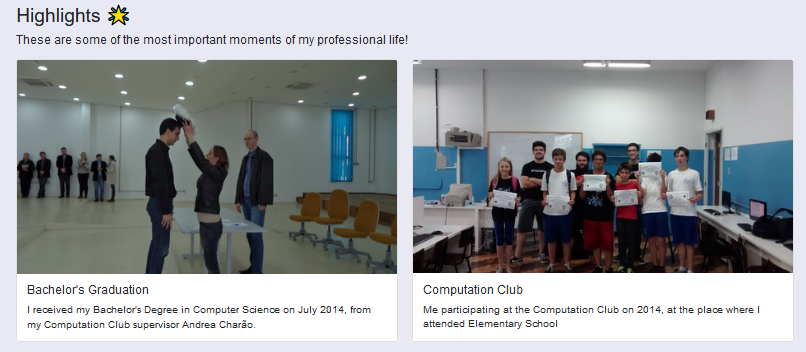

## Projeto

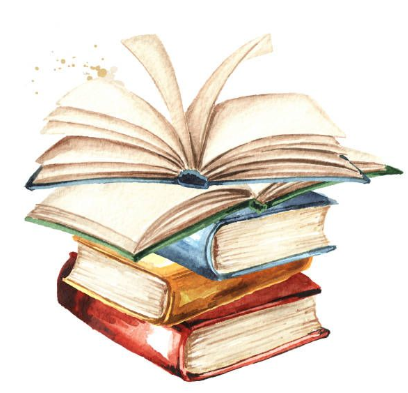

Seu trabalho é, para o site que estamos desenvolvendo nesta disciplina, converter as funções que geram as _views_ na biblioteca Django para classes.

Mais especificamente, você terá que:

1. Converter as funções que geram _views_ para classes;
2. Para cada classe/view, herdar uma das classes da biblioteca [django-bakery](https://pypi.org/project/django-bakery) (por exemplo, `BuildableView`);
3. Gerar o HTML estático do site.

Um tutorial é fornecido nesta página da documentação desta biblioteca: https://palewi.re/docs/django-bakery/gettingstarted.html

### Por que fazer isso? 🤔

Isso vai permitir que possamos hospedar nossos sites em um servidor estático, como o [GitHub Pages](https://pages.github.com/)!

* Django é uma biblioteca para páginas Web **dinâmicas** (que mandam requisições para o servidor, são processadas, e retornadas)
* Um servidor **estático** serve apenas os arquivos HTML, CSS e scripts Javascript para o navegador. O resto todo deve ser executado pelo lado do cliente!

Na próxima aula veremos como hospedar o site estático no GitHub Pages!

### https://henryzord.github.io

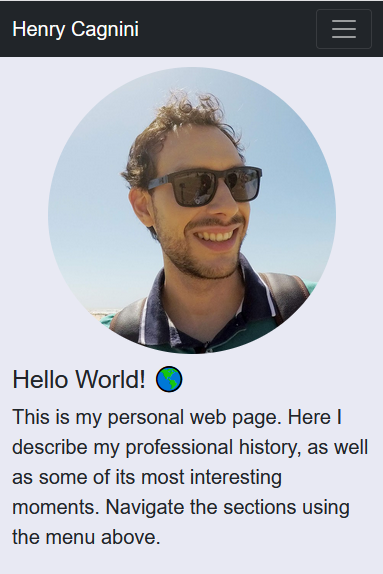

## Exercício

Vamos colocar em prática os conhecimentos adquiridos nesta aula!

Você foi contratado para implementar o sistema de uma biblioteca. 

O sistema deve ser capaz de:
* Listar os livros no catálogo
* Realizar o empréstimo de um livro
* Realizar a entrega de um livro
* Evitar que um livro que já está emprestado seja emprestado novamente

Para ajudá-lo a resolver este exercício, responda às seguintes perguntas:

1. Que objetos (ou entidades) neste problema precisam ser modelados como classes?
2. Quais os atributos (características) que cada classe deve possuir?
3. Quais as ações (métodos) que cada classe deve realizar?

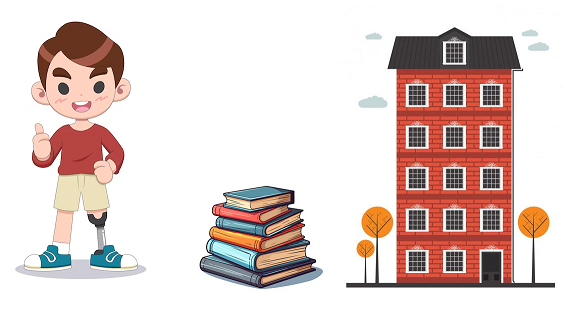